## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

ERROR! Session/line number was not unique in database. History logging moved to new session 10


In [3]:

import csv

input_file = 'bank-additional-full.csv'
output_file = 'bank-additional-full.csv'

with open(input_file, 'r') as infile:
    csv_reader = csv.reader(infile, delimiter=';')
    header = next(csv_reader)
    rows = [row for row in csv_reader]

with open(output_file, 'w') as outfile:
    csv_writer = csv.writer(outfile, delimiter=',')
    csv_writer.writerow(header)
    csv_writer.writerows(rows)

In [5]:
dataset = pd.read_csv('bank-additional-full.csv')

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [6]:
dataset["y"] = dataset["y"].map({'yes': 1, 'no':0}).astype(int)

In [7]:
bank_target = dataset[["y"]]
bank_target

,y
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [8]:
bank_client = dataset[['age','job','marital','education','default','housing','loan']]
bank_client 

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes
...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no
41184,46,blue-collar,married,professional.course,no,no,no
41185,56,retired,married,university.degree,no,yes,no
41186,44,technician,married,professional.course,no,no,no


**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

In [10]:
print(bank_client['age'].max())
print(bank_client['age'].min())
print(np.isnan(bank_client['age']).sum())

98
17
0


**Висновки з 1-4 завдання (детальні)**

Ми почали з простої першочергової перевірки кожного датасету і оглянули їх розмірність та основну статистичну інформацію по числовим змінним. Після аналізу нашої цільової змінної, ми замінили її значення на "1" для "так" і "0" для "ні".

Далі ми вибрали атрибути, які характеризують клієнтів банку, для подальшого аналізу. Перевіривши унікальні значення кожного атрибуту, ми отримали уявлення про різноманітність інформації.

Аналізуючи зміну віку клієнтів, ми визначили максимальне і мінімальне значення. Також ми перевірили наявність пропущених значень (NaN), яких не було виявлено. Графіки показали важку правосторонню хвіст розподілу віку, що свідчить про значну кількість старших осіб, які виходять за межі міжквартильного діапазону. Розподіл даних має позитивне перекослення, з більшістю спостережень у діапазоні від 20 до 40 років. Це може вплинути на результати аналізу, і потрібно врахувати це при подальших дослідженнях.

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [12]:
def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100
    high_percentile: upper bound between 0 and 100

    returns: pd.DataFrame with detected outliers

    """

    sorted_data = np.sort(df[column])
    # Calculate Q1, Q2, Q3 and IQR.
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')

    IQR = Q3 - Q1
    print('')
    print(f"Interquantile range: {IQR}")
    print('')
    print('----------------------------------------------------------')
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print('')
    print(f" Lower bound: {low_lim}")
    print('')
    print(f" Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')
    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print('')
    print(f"Outliers in the dataset:")
    display(outliers)


    return outliers
    
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)


Q1 10 percentile of the given data: 28.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

 Lower bound: -12.5

 Upper bound: 95.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan
38452,98,retired,married,basic.4y,unknown,yes,no
38455,98,retired,married,basic.4y,unknown,yes,no


**Висновки з завдання 5 (детальні)**

1.   
2.   
3. ...

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

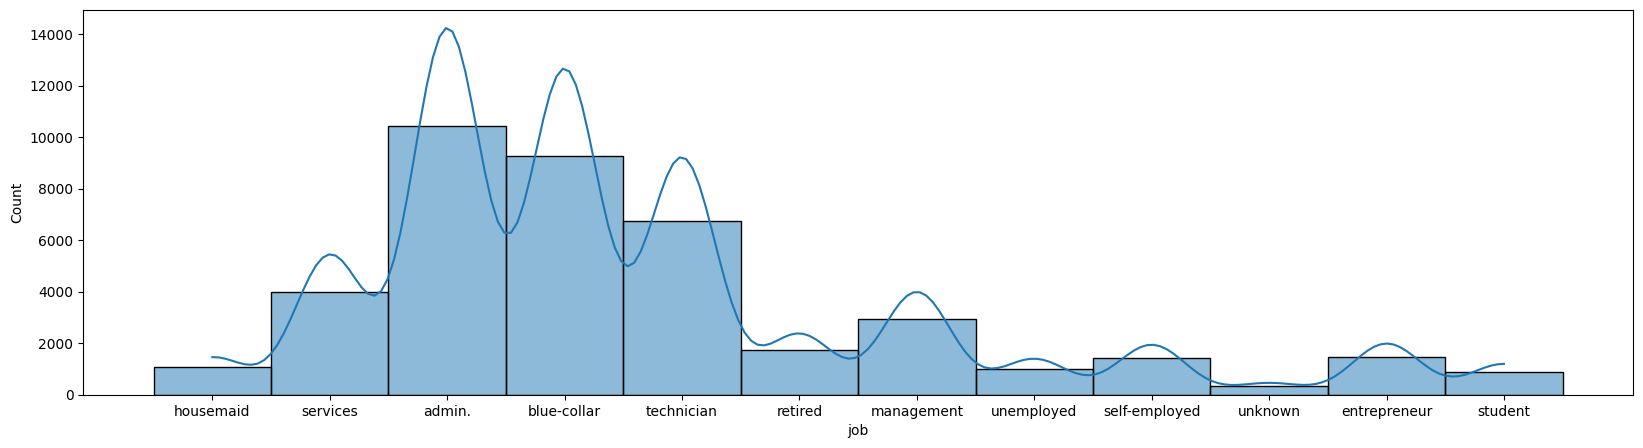

In [13]:
fig = plt.figure(figsize=(20, 5))
sns.histplot(bank_client['job'], kde=True)
plt.show()

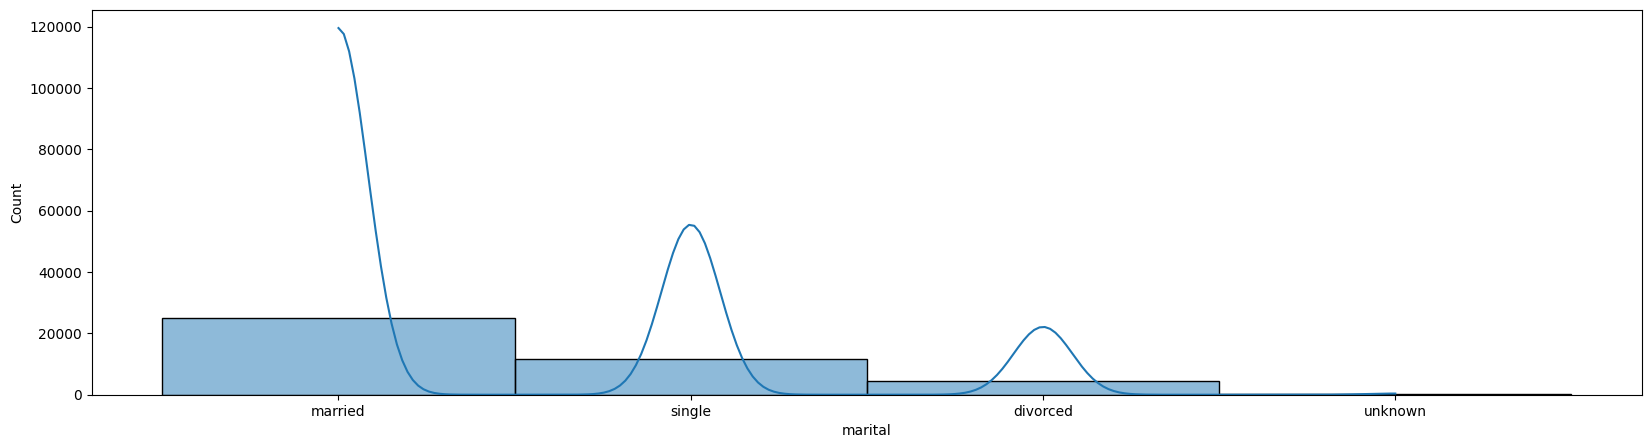

In [14]:
fig = plt.figure(figsize=(20, 5))
sns.histplot(bank_client['marital'], kde=True)
plt.show()

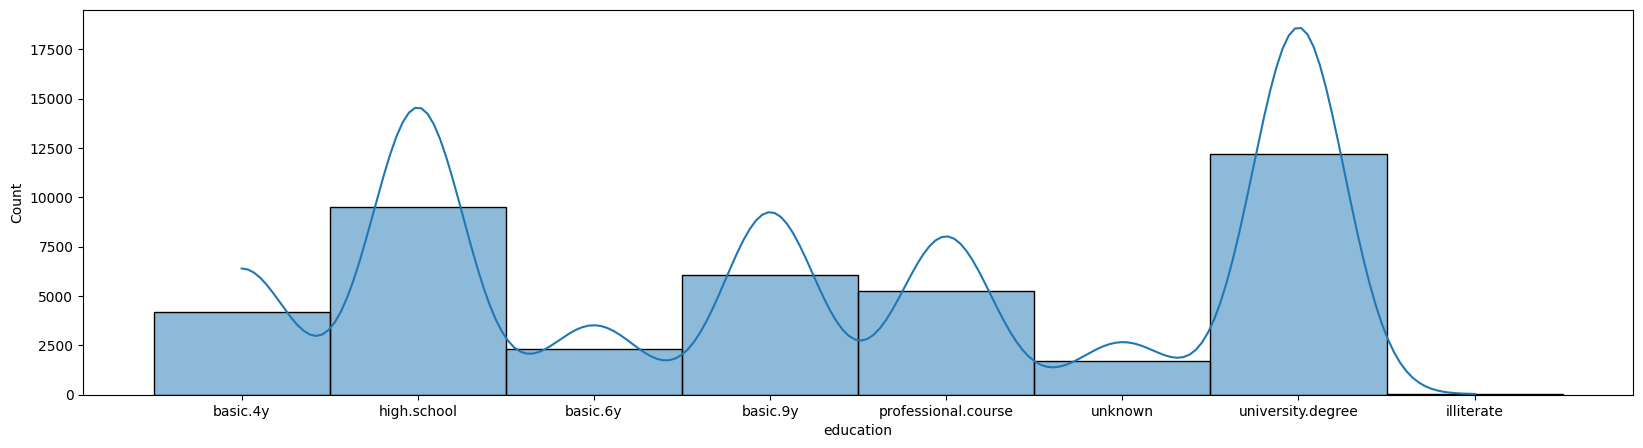

In [15]:
fig = plt.figure(figsize=(20, 5))
sns.histplot(bank_client['education'], kde=True)
plt.show()

**Висновки з завдання 6 (детальні)**

Для атрибуту "job":

Найпоширеніші професії: admin, blue-collar, technician.
Менш поширені професії: housemaid, student, unknown, entrepreneur, unemployed.
Для атрибуту "marital":

Найбільше - "married".
Середня кількість - "single".
Менше - "divorced".
Найменше - "unknown".
Для атрибуту "education":

Найбільше - "university.degree".
Помірна кількість - "high.school", "basic.4y", "basic.9y", "professional.course", "unknown".
Менше - "basic.6y".
Дуже мало або взагалі немає - "illiterate".

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

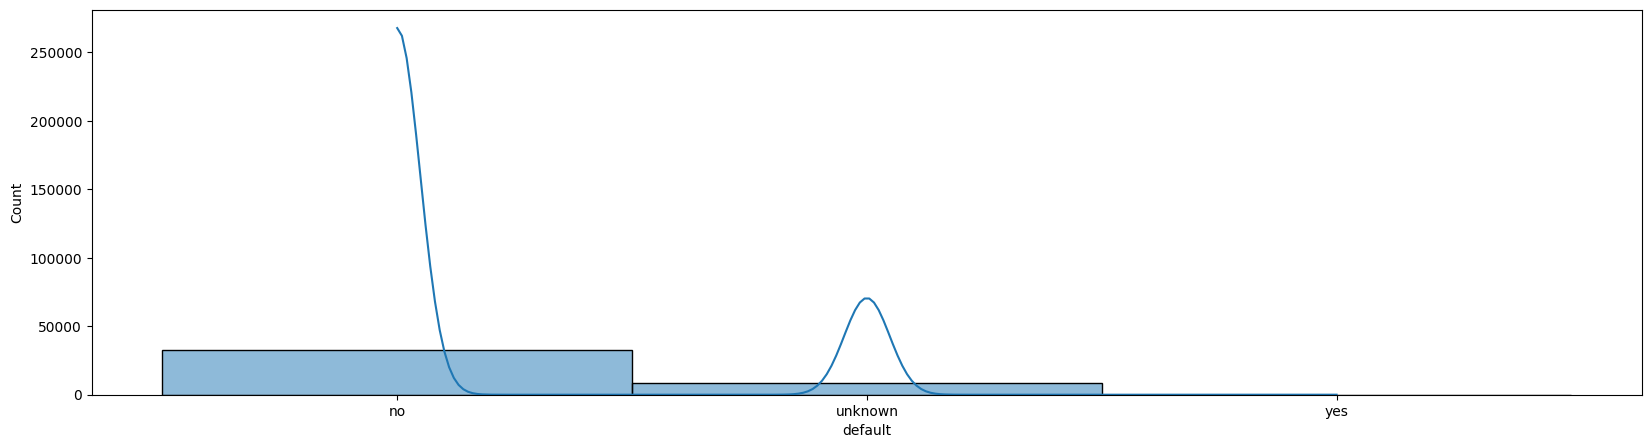

In [16]:
fig = plt.figure(figsize=(20, 5))
sns.histplot(bank_client['default'], kde=True)
plt.show()  

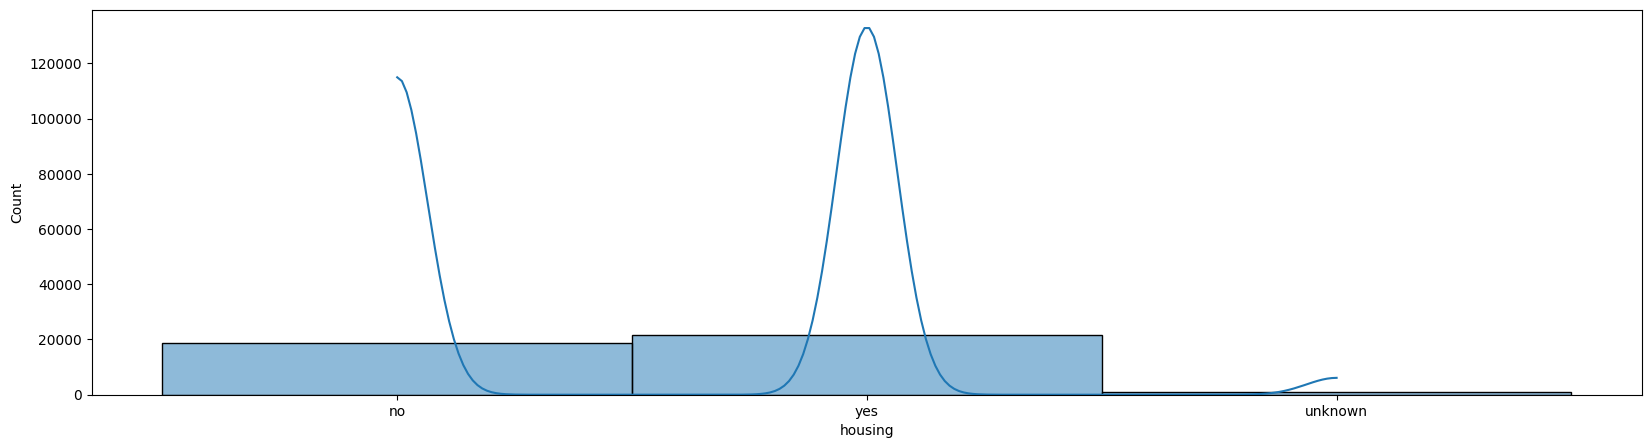

In [17]:
fig = plt.figure(figsize=(20, 5))
sns.histplot(bank_client['housing'], kde=True)
plt.show()

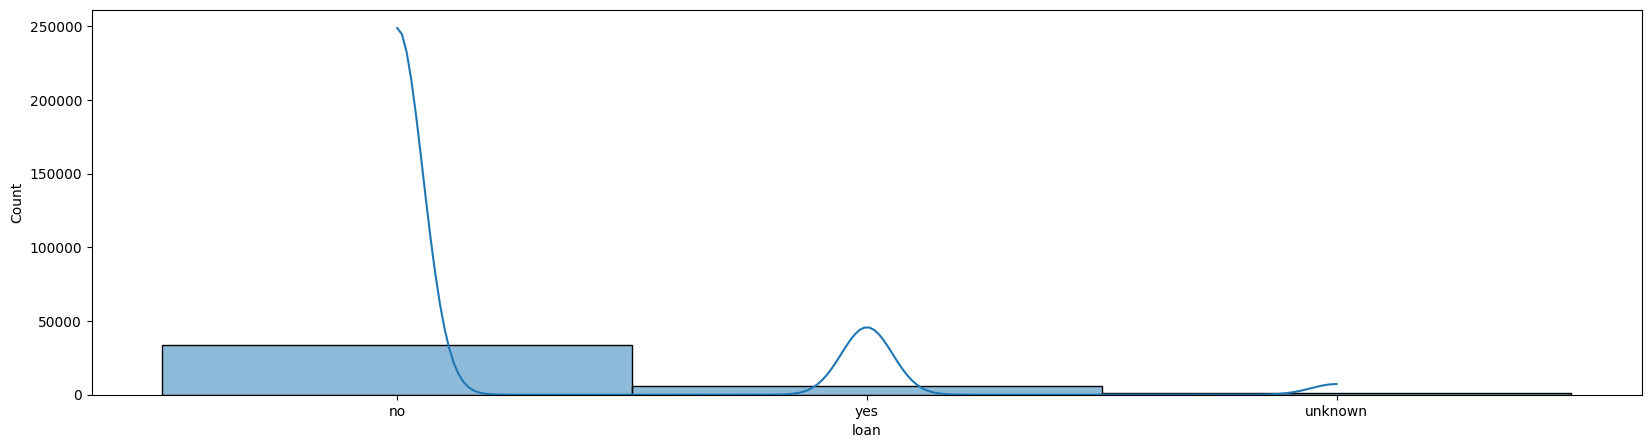

In [18]:
fig = plt.figure(figsize=(20, 5))
sns.histplot(bank_client['loan'], kde=True)
plt.show()

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [19]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
      # Leaves NaN as it is.
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = df[col].fillna('<MISSING>')
        df[col] = le.fit_transform(df[col])
    return df

In [20]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])
bank_client

,age,job,marital,education,default,housing,loan
0,56,3,1,0,0,0,0
1,57,7,1,3,1,0,0
2,37,7,1,3,0,2,0
3,40,0,1,1,0,0,0
4,56,7,1,3,0,0,2
...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0
41184,46,1,1,5,0,0,0
41185,56,5,1,6,0,2,0
41186,44,9,1,5,0,0,0


**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [21]:
def encode_age(dataframe: pd.DataFrame, age_col: str ) -> pd.DataFrame:
  """
  Function for encoding age column
    
  df: pd.DataFrame to encode
  age_col: age col to encode 
  """
  dataframe[age_col + '_qcut'] = pd.qcut(dataframe[age_col], 4, labels=False)
          
  return dataframe

In [22]:
bank_client = encode_age(bank_client, 'age')
print(bank_client['age_qcut'].unique())

[3 1 2 0]


**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних

0: Вік людини належить до першого квартилю, що означає, що вона знаходиться серед найнижчих 25% значень віку в датафреймі.

1: Вік людини належить до другого квартилю, тобто він розташований між 25% і 50% значень віку.

2: Людина належить до третього квартилю, що означає, що він знаходиться між 50% і 75% значень віку в датафреймі.

3: Вік людини належить до четвертого квартилю, тобто він знаходиться серед найвищих 25% значень віку в датафреймі.

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [23]:
bank_relat = dataset[['contact','month','day_of_week','duration']]
bank_relat.isna().sum()

contact        0
month          0
day_of_week    0
duration       0
dtype: int64

**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [24]:
for column in bank_relat:
    if column not in ['duration']:
        print(f"Unique values in {column}:")
        print(bank_relat[column].unique())
        print("\n")

Unique values in contact:
['telephone' 'cellular']


Unique values in month:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


Unique values in day_of_week:
['mon' 'tue' 'wed' 'thu' 'fri']




# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



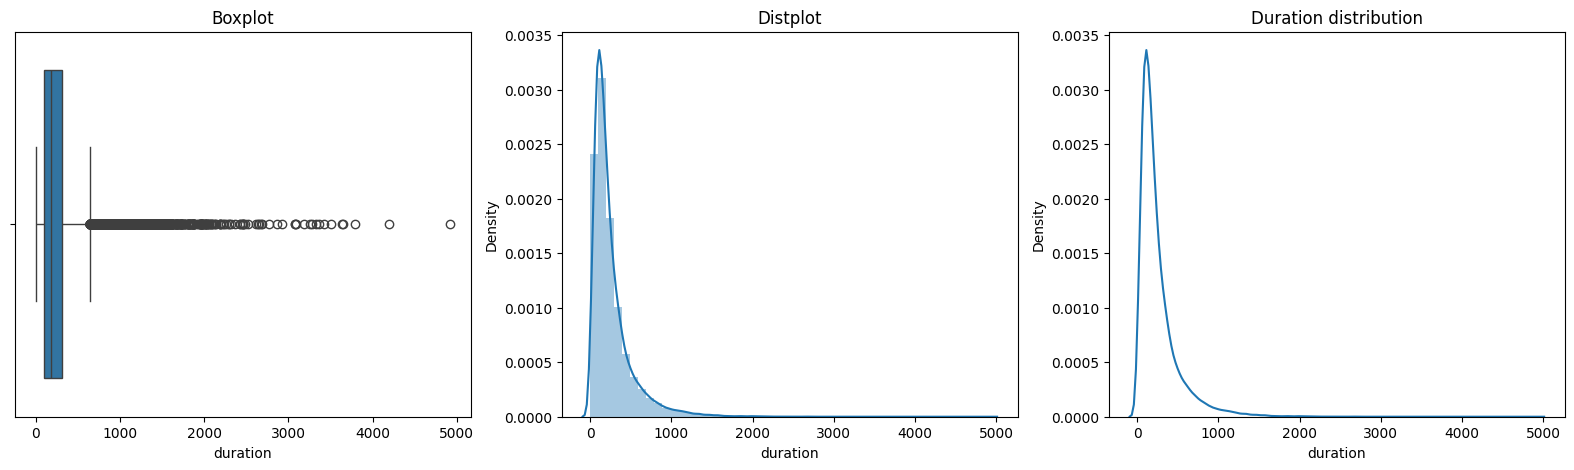

In [25]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

sns.boxplot(x='duration',data=bank_relat,ax=ax[0])
ax[0].set_title('Boxplot')

sns.distplot(bank_relat['duration'],ax=ax[1],kde=True,label='Histogram')
ax[1].set_title('Distplot')

sns.kdeplot(bank_relat['duration'],ax=ax[2],label='KDE')
ax[2].set_title('Duration distribution')
plt.show()

**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [26]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
      # Leaves NaN as it is.
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = df[col].fillna('<MISSING>')
        df[col] = le.fit_transform(df[col])
    return df

bank_relat = encode_categorical_columns(bank_relat, ['contact', 'month', 'day_of_week'])
bank_relat

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307
...,...,...,...,...
41183,0,7,0,334
41184,0,7,0,383
41185,0,7,0,189
41186,0,7,0,442


**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [28]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str ) -> pd.DataFrame:
  """
  Function for encoding duration column
    
  df: pd.DataFrame to encode
  duration_col: duration col to encode 
  """
  
  dataframe[duration_col + '_qcut'] = pd.qcut(dataframe[duration_col], 4, labels=False)
          
  return dataframe

In [29]:
bank_relat = encode_duration(bank_relat, 'duration')
print(bank_relat['duration_qcut'].unique())

[2 1 3 0]


## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [32]:
bank_socec = dataset[['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
bank_socec

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...
41183,-1.1,94.767,-50.8,1.028,4963.6
41184,-1.1,94.767,-50.8,1.028,4963.6
41185,-1.1,94.767,-50.8,1.028,4963.6
41186,-1.1,94.767,-50.8,1.028,4963.6


**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [31]:
bank_other = dataset[['campaign','pdays','previous','poutcome']]
bank_other

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent
...,...,...,...,...
41183,1,999,0,nonexistent
41184,1,999,0,nonexistent
41185,2,999,0,nonexistent
41186,1,999,0,nonexistent


**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [33]:
bank_other['poutcome'] = bank_other['poutcome'].map({'nonexistent': 0, 'failure': 1, 'success': 2})

print(bank_other['poutcome'].unique())

[0 1 2]


## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [34]:
bank_final = pd.concat([bank_client,bank_relat,bank_socec,bank_other ], axis=1, join='inner')


bank_final = bank_final[['poutcome', 'age_qcut', 'job', 'marital', 'education', 'default', 
                         'housing', 'loan', 'contact', 'month','emp.var.rate',
                         'cons.price.idx','cons.conf.idx','euribor3m','nr.employed','day_of_week',
                         'duration_qcut','campaign','pdays','previous']]


**Завдання 19** Провести ділення вибірки

In [35]:
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """
    
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold

In [36]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final,  bank_target['y'], 0.2, 10, 101)

In [37]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):
  
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  return X_train, X_test

In [38]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [39]:
logmodel = LogisticRegression() 
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7112  167]
 [ 633  326]]
90.0


## k-NN

k=1 86.82 (+/- 0.43)
k=2 89.33 (+/- 0.51)
k=3 88.99 (+/- 0.42)
k=4 89.83 (+/- 0.50)
k=5 89.76 (+/- 0.70)
k=6 90.24 (+/- 0.54)
k=7 90.13 (+/- 0.62)
k=8 90.37 (+/- 0.51)
k=9 90.33 (+/- 0.68)
k=10 90.40 (+/- 0.54)
k=11 90.39 (+/- 0.63)
k=12 90.39 (+/- 0.55)
k=13 90.45 (+/- 0.62)
k=14 90.43 (+/- 0.61)
k=15 90.47 (+/- 0.65)
k=16 90.51 (+/- 0.65)
k=17 90.55 (+/- 0.63)
k=18 90.55 (+/- 0.64)
k=19 90.56 (+/- 0.68)
k=20 90.51 (+/- 0.66)
k=21 90.56 (+/- 0.70)
k=22 90.53 (+/- 0.63)
k=23 90.55 (+/- 0.67)
k=24 90.53 (+/- 0.64)
k=25 90.59 (+/- 0.64)
The optimal number of neighbors is 24 with 90.6%


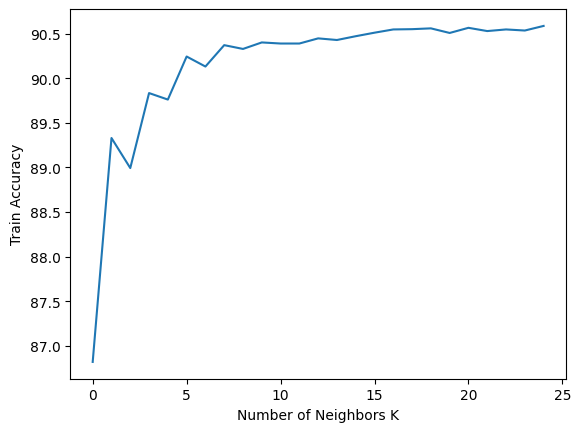

In [40]:
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

## Логістична Регресія

In [41]:
models = pd.DataFrame({
                'Models': ['LogisticRegression'],
                'Score':  [LOGCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,LogisticRegression,0.903499


**Висновки по моделям (детальні)**

Модель логістичної регресії показала точність 90% на тестовому наборі даних. Це високий показник, але важливо враховувати, що точність може бути обмеженою метрикою, особливо якщо класи не збалансовані. Хоча 90% точність може здатися дуже високою, варто зазначити, що така точність може бути недосяжною для деяких завдань. Тому потрібно уважно розглянути інші метрики та можливо розглянути використання інших моделей.

Модель k-NN з оптимальною кількістю сусідів показала точність 90% на тестовому наборі даних. Проте, ця метрика може бути не найкращою, особливо при несбалансованих класах. Тож потрібно розглянути інші моделі для аналізу.

Ми використовуємо точність як основну метрику для оцінки ефективності наших моделей. Проте, важливо зауважити, що точність може бути обманливою, особливо якщо класи не збалансовані. У таких випадках інші метрики можуть бути більш відомими.